# Objectives of the task

In [1]:
# Problem Statement 1: As a business manager in a superstore, 
# what are the weak areas that need to be improved on to make more profits?

#Problem Statement 2: What other business problems can be derived from this data set?

# Importing relevant Python Libraries

In [2]:
# importing all the useful packages that will enhance our exploration and 
# understanding of the dataset to generate useful insights.

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.register_matplotlib_converters()

import seaborn as sns
sns.set(style = "ticks")
from scipy.stats import kendalltau # Used for performing a correlation test between varaibles in hexbin

# Importing the dataset and Pre-processing

In [3]:
# Importing the csv dataset into the notebook

url = "SampleSuperstore.csv"
superstore_data = pd.read_csv(url)

superstore_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# Preliminary observation of dataset, especially for extent of missing entries

superstore_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#Measure variables; Sales, Quantity, Discount, Profit, (Profit/Quantity)

# Creating calculated fields from existing variables to provide more salient insights
superstore_data["Profit_perQuantity"] = superstore_data.Profit / superstore_data.Quantity

superstore_data.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_perQuantity
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,20.9568
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,73.1940
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,3.4357
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-76.6062
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,1.2582


In [6]:
#rolling up the dataset in (categorical) groups for preliminary analysis

ShipMode_grouped = superstore_data.groupby("Ship Mode")
Segment_grouped = superstore_data.groupby("Segment")

City_grouped = superstore_data.groupby("City")
State_grouped = superstore_data.groupby("State")
Region_grouped = superstore_data.groupby("Region")

Category_grouped = superstore_data.groupby("Category")
Subcategory_grouped = superstore_data.groupby("Sub-Category")


# Tabular description of dataset

In [7]:
pd.set_option('max_rows', 10)

ShipMode_grouped['Profit'].agg([np.count_nonzero, np.mean,np.max, np.min]).sort_values(by = 'mean', ascending = False)

,count_nonzero,mean,amax,amin
Ship Mode,,,,
First Class,1528,31.839948,6719.9808,-2639.9912
Second Class,1937,29.535545,2799.9840,-1862.3124
Same Day,542,29.266591,2229.0240,-3839.9904
Standard Class,5922,27.494770,8399.9760,-6599.9780


In [8]:
                            #Interpretation

# Our judgement of the Shipping Mode in relation to profitability should not only be based on the average profit
# But also on the variation of profitability (maximum/minimum profits)

# The visualization below will explain this concept much better.

In [9]:
Segment_grouped['Profit'].agg([np.count_nonzero, np.mean,np.max, np.min]).sort_values(by = 'mean', ascending = False)


,count_nonzero,mean,amax,amin
Segment,,,,
Home Office,1770,33.818664,3919.9888,-3399.9800
Corporate,3003,30.456667,8399.9760,-3839.9904
Consumer,5156,25.836873,6719.9808,-6599.9780


In [10]:
                           #Interpretation

# Likewise this, we need to look beyond average profit into variation of profitability (Maximum/minimum profit)

In [11]:
pd.set_option('max_rows', 10)

City_grouped['Profit'].agg([np.count_nonzero, np.mean,np.max, np.min]).sort_values(by = 'mean', ascending = True)




,count_nonzero,mean,amax,amin
City,,,,
Bethlehem,5,-200.619160,0.7110,-913.1760
Champaign,1,-182.352000,-182.3520,-182.3520
Oswego,3,-178.709200,4.1125,-533.7325
Round Rock,7,-169.061614,32.3982,-786.0144
Lancaster,45,-157.371052,83.2097,-6599.9780
...,...,...,...,...
Appleton,2,277.383150,544.4175,10.3488
Minneapolis,22,296.721070,4630.4755,0.0000
Lafayette,30,323.173794,8399.9760,0.0000


In [12]:
                               #Interpretation

# Cities such as Bethlehem, Champaign, Oswego and so on need to be improved on profit-wise!

# I had put my investment in cities such as Minneapolis, Lafayette if I certainly don't want to make a loss

In [13]:
pd.set_option('max_rows', 10)

State_grouped['Profit'].agg([np.count_nonzero, np.mean,np.max, np.min]).sort_values(by = 'mean', ascending = True)



,count_nonzero,mean,amax,amin
State,,,,
Ohio,467,-36.186304,607.6080,-6599.9780
Colorado,180,-35.867351,247.9960,-3399.9800
North Carolina,248,-30.083985,303.8040,-3839.9904
Tennessee,182,-29.189583,223.9936,-1237.8462
Pennsylvania,581,-26.507598,1119.9968,-1665.0522
...,...,...,...,...
Minnesota,88,121.608847,4630.4755,0.0000
Montana,15,122.221900,1379.9770,2.2098
Indiana,148,123.375411,8399.9760,0.0000


In [14]:
                            #Interpretation

# While the average profits for States like Vermont, Rhode Island, Indiana and the likes seems decent,
# More improvement needed for States like Ohio, Colorado, North Carolina and so on.

# Also Sales in States with the high average profits seems low; an area for improvement


# A business manager/investor with a low risk appetite might want to deplore resources 
# to States like Minnesota and Indiana, as you are less likely to make a loss.

In [15]:
pd.set_option('max_rows', 10)

Region_grouped['Profit'].agg([np.count_nonzero, np.mean,np.max, np.min]).sort_values(by = 'mean', ascending = False)



,count_nonzero,mean,amax,amin
Region,,,,
West,3181,33.849032,6719.9808,-3399.9800
East,2829,32.135808,5039.9856,-6599.9780
South,1607,28.857673,3177.4750,-3839.9904
Central,2312,17.092709,8399.9760,-3701.8928


In [16]:
pd.set_option('max_rows', 10)

Category_grouped['Profit_perQuantity'].agg([np.count_nonzero, np.mean,np.max, np.min]).sort_values(by = 'count_nonzero', ascending = False)



,count_nonzero,mean,amax,amin
Category,,,,
Office Supplies,5997,5.819061,926.0951,-585.8969
Furniture,2088,1.935615,202.6254,-237.8646
Technology,1844,20.993948,1679.9952,-1319.9956


In [17]:
                #Interpretation

# Investing in the technology product is profitable as\ 
# indicated in the average and maximum profit per product sales\

# But the technology sector also comes with the greatest risk 
# in terms of the extent of loss per product sale (-1320)

# An business manager/investor with a low risk appetite should focus on Furniture sales!

In [18]:
pd.set_option('max_rows', 10)

Subcategory_grouped['Profit_perQuantity'].agg([np.count_nonzero, np.mean,np.max, np.min]).sort_values(by = 'amax', ascending = True)



,count_nonzero,mean,amax,amin
Sub-Category,,,,
Fasteners,212,1.058296,5.3956,-1.4782
Art,796,2.111323,16.0820,0.0834
Labels,364,3.688775,48.1719,0.6786
Paper,1370,6.803805,50.3280,0.5886
Furnishings,948,3.547943,54.5584,-85.4900
...,...,...,...,...
Phones,887,13.826966,187.7970,-84.4779
Bookcases,226,-2.707413,202.6254,-237.8646
Binders,1523,7.211178,926.0951,-585.8969


In [19]:
          #Interpretation
    
# As a Business manager, I will focus on products 
# generating on average the most profit per quantity sold (Copiers)!

# Unfortunately just 68 copiers were sold compared to 212 fasteners sold that has the least profit per quantity!

# Visualization of dataset

<Figure size 1008x720 with 0 Axes>

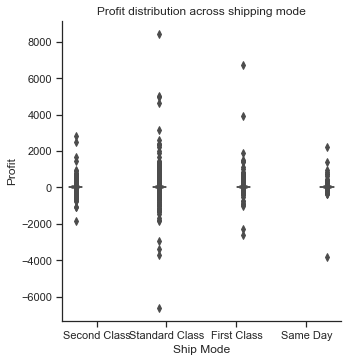

<Figure size 1008x720 with 0 Axes>

In [20]:
sns.catplot(x= "Ship Mode", y = "Profit", kind = "box", data = superstore_data, hue = "Ship Mode" )

plt.title("Profit distribution across shipping mode")

plt.figure(figsize = (14,10))

In [21]:
# More predictability in the margin of profit when shippping by "Same Day" and "Second Class" Mode

<Figure size 1008x720 with 0 Axes>

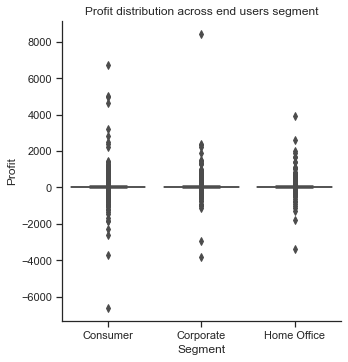

<Figure size 1008x720 with 0 Axes>

In [22]:
sns.catplot(x= "Segment", y = "Profit", kind = "box", data = superstore_data) #hue = "Segment" )

plt.title("Profit distribution across end users segment")

plt.figure(figsize = (14,10))

<Figure size 1440x720 with 0 Axes>

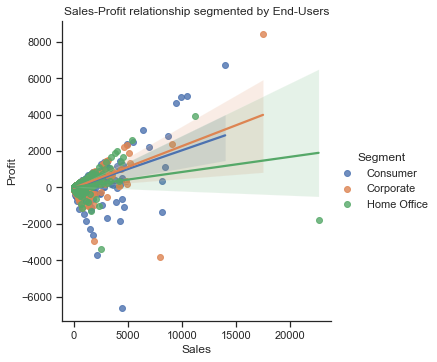

<Figure size 1440x720 with 0 Axes>

In [23]:
sns.lmplot(x = "Sales", y = "Profit", hue = "Segment", data = superstore_data)

plt.title("Sales-Profit relationship segmented by End-Users")

plt.figure(figsize = (20,10))

In [24]:
                 #Interpretation
# The consumer segment end users need to be improved on;\
# even though it shows glimpse of high outlier profits, 
# there seem to be a serious and consistent deep in losses


# Also increasing sales to  Corporate end-users tend to yield the most profit!

<Figure size 1008x720 with 0 Axes>

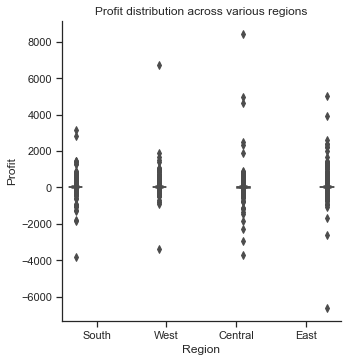

<Figure size 1008x720 with 0 Axes>

In [25]:
sns.catplot(x= "Region", y = "Profit", kind = "box", data = superstore_data, hue = "Region")

plt.title("Profit distribution across various regions")

plt.figure(figsize = (14,10))

In [26]:
# As an investor, I will be discouraged in investing across the Central and South region!

<Figure size 1008x720 with 0 Axes>

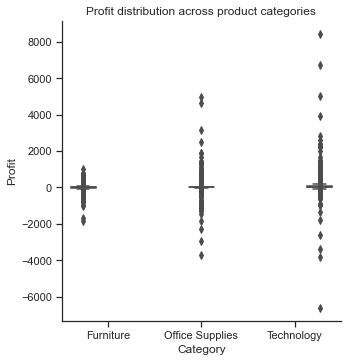

<Figure size 1008x720 with 0 Axes>

In [27]:
sns.catplot(x= "Category", y = "Profit", kind = "box", data = superstore_data, hue = "Category")

plt.title("Profit distribution across product categories")

plt.figure(figsize = (14,10))

<Figure size 1008x720 with 0 Axes>

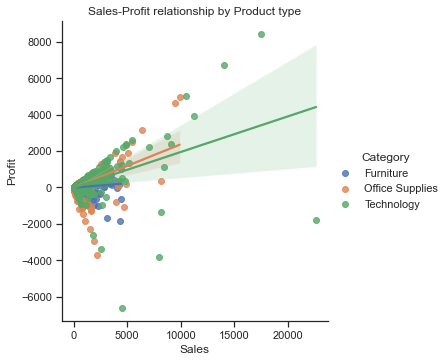

<Figure size 1008x720 with 0 Axes>

In [28]:
sns.lmplot(x = "Sales", y = "Profit", hue = "Category", data = superstore_data)

plt.title("Sales-Profit relationship by Product type")

plt.figure(figsize = (14,10))

In [29]:
                 #Interpretation
# Relatively, Technology seems to be doing pretty much better\
# but I had still say we need to make all product categories more profitable!

# Also increasing Sales of Furniture product does not necessarily translate to an increase in profit,\
# unlike Office Supplies with the sharpest slope  .



<Figure size 1008x720 with 0 Axes>

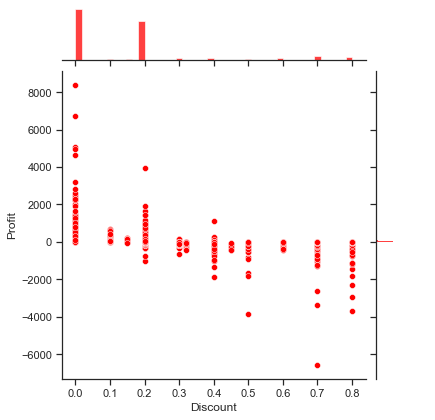

<Figure size 1008x720 with 0 Axes>

In [38]:
sns.jointplot(x = "Discount", y = "Profit", data = superstore_data, color= "red")

plt.figure(figsize = (14,10))



<Figure size 1008x720 with 0 Axes>

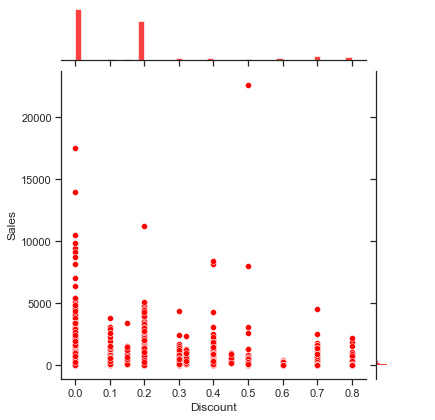

<Figure size 1008x720 with 0 Axes>

In [39]:
sns.jointplot(x = "Discount", y = "Sales", data = superstore_data, color= "red")

plt.figure(figsize = (14,10))


In [ ]:
# The concept of discounting is not adding anything meaningful to profitability or sales